<a href="https://colab.research.google.com/github/malaika-n/Predict-Lead-Score/blob/main/Predict_Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict Lead Score

### Building a lead scoring model using PyCaret to increase the ROI on marketing campaigns

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 108.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 106.4 M

Importing the Lead Conversion dataset from Kaggle.
The dataset contains over 9,000 leads with customer features such as:
* Lead origin
* Source of lead
* Total time spent on the website
* Total visits on the website
* Demographics information
* Target column *Converted* indicating 1 for conversion and 0 for no conversion

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# read csv data
data = pd.read_csv('/content/drive/MyDrive/Portfolio Projects/Lead Scoring/Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Exploratory Data Analysis

In [ ]:
# check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Although there are several columns that have many missing values PyCaret will automatically handle the missing values.

### Visually exploring the relationship between time spent on the website and the activity score along with the source of lead:

In [ ]:
# creating a copy of the data
data2 = data.copy()
data2.dropna(axis=0, inplace=True)
data2['Converted'] = data2['Converted'].replace({1 : 'Yes', 0 : 'No'})

import plotly.express as px

fig = px.scatter(x=data2['Total Time Spent on Website'], y=data2['Asymmetrique Activity Score'],
                 color = data2['Converted'], template = 'plotly_white',
                 facet_col = data2['Lead Origin'], facet_row = data2['Do Not Email'],
                 title = 'Lead Conversion by Total time spent on Website, Activity Score and Lead Origin',
                 labels = {'x' : 'Total Time Spent on Website', 'y' : 'Activity Score'})

fig.show()

Leads coming from the “Add Forms” are likely to convert into sales irrespective of the time spent on the website or the score. The leads originating through API or the landing page of the website tell a different story. A higher score combined with a higher time spent on the website is more likely to generate leads into final sales.

### Data Preparation

In [ ]:
# init setup
from pycaret.classification import *
s = setup(data, target = 'Converted', ignore_features = ['Prospect ID', 'Lead Number'])

,Description,Value
0,Session id,6452
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(9240, 37)"
4,Transformed data shape,"(9240, 136)"
5,Transformed train set shape,"(6468, 136)"
6,Transformed test set shape,"(2772, 136)"
7,Ignore features,2
8,Ordinal features,10
9,Numeric features,5


Initializing the setup function in PyCaret automatically profiles the dataset and infers the data types for all input variables.

### Model Training & Selection

Training process by using `compare_models` functionality. This function trains all the algorithms available in the model library and evaluates multiple performance metrics using cross-validation.

In [ ]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9382,0.9791,0.9146,0.9244,0.9193,0.8692,0.8694,0.6820
lightgbm,Light Gradient Boosting Machine,0.9369,0.9787,0.9150,0.9212,0.9179,0.8667,0.8669,1.0760
gbc,Gradient Boosting Classifier,0.9332,0.9777,0.9109,0.9156,0.9131,0.8589,0.8591,1.3740
rf,Random Forest Classifier,0.9323,0.9749,0.8945,0.9273,0.9105,0.8561,0.8566,0.9110
lr,Logistic Regression,0.9273,0.9725,0.8909,0.9184,0.9043,0.8457,0.8462,1.4700
ada,Ada Boost Classifier,0.9232,0.9716,0.8901,0.9087,0.8992,0.8371,0.8374,0.7490
lda,Linear Discriminant Analysis,0.9225,0.9699,0.8764,0.9191,0.8971,0.8351,0.8359,0.5260
et,Extra Trees Classifier,0.9247,0.9695,0.8825,0.9193,0.9003,0.8399,0.8405,0.9010
dt,Decision Tree Classifier,0.9062,0.9032,0.8777,0.8788,0.8780,0.8018,0.8020,0.4270
nb,Naive Bayes,0.7998,0.8711,0.5877,0.8461,0.6931,0.5517,0.5722,0.4390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**The best model based on AUC is `Catboost Classifier` with an average 10 fold cross-validated AUC of 0.9864.**

In [ ]:
# print best_model parameters
print(best_model.get_all_params())

# except for catboost you can do this:
print(best_model)

AttributeError: 'XGBClassifier' object has no attribute 'get_all_params'

### Model Analysis

Utilizing an AUC — ROC curve as it is used as a performance measurement for the classification problems at various threshold settings.
ROC is a probability curve and AUC represents the degree or measure of

*   ROC is a probability curve and AUC represents the degree or measure of separability.
* It tells how much the model is capable of distinguishing between classes.
* The higher the AUC, the better the model is at predicting positive and negative classes.

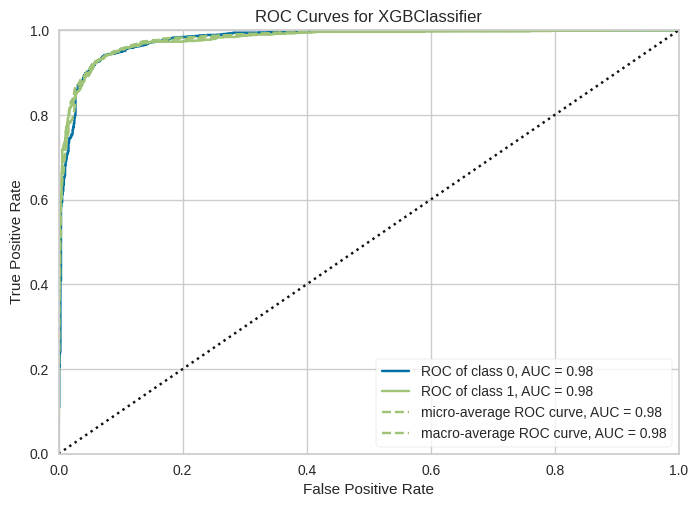

In [ ]:
# AUC Plot
plot_model(best_model, plot = 'auc')


### SHAP Values

Unlike AUC-ROC, SHAP values does not tell us anything about model performance. It interprets the impact of having a certain value for a given feature in comparison to the prediction made if that feature took some baseline value.

* The y-axis, in the chart below, has all the important features of the model
* The x-axis is the Shapley value of associated features and the color scale (the actual value of the feature)
* Each dot on the graph at each feature is a customer lead (from the test set) — overlapping each other

In [ ]:
# Shapley Values
interpret_model(best_model)

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

### Feature Importance Plot

A feature importance plot is just another way to interpret the results of the model and tells us if the feature is important.

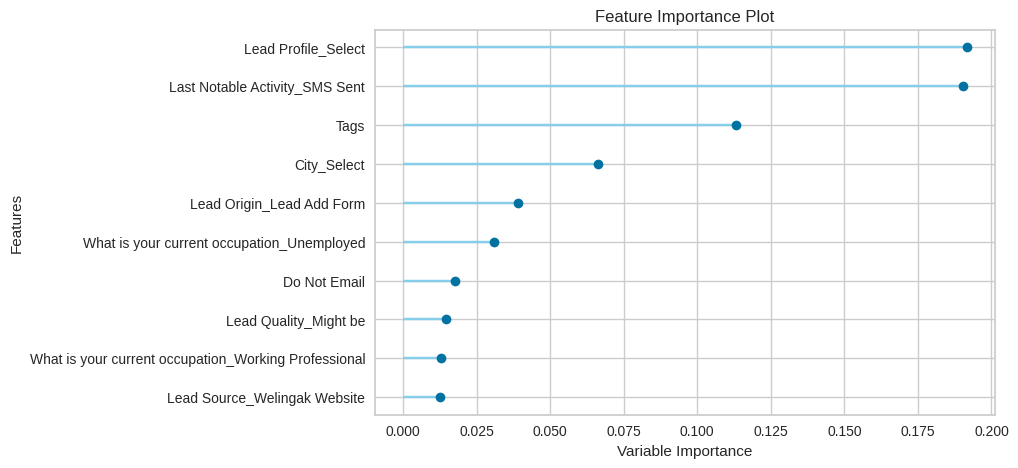

In [ ]:
# Feature Importance
plot_model(best_model, plot = 'feature')

### Confusion Matrix

Comparing the predictions with actual labels and divide them into four quadrants using a confusion matrix:

* True Positive (Prediction: Conversion, Actual: Conversion)
* True Negative (Prediction: No Conversion, Actual: No Conversion)
* False Positive (Prediction: Conversion, Actual: No Conversion)
* False Negative (Prediction: No Conversion, Actual: Conversion)


* 972 customers are true positives=the leads model predicted will convert and they converted
* 93 leads are false positive
* 96 leads are false negatives
* 1611 leads are true negatives

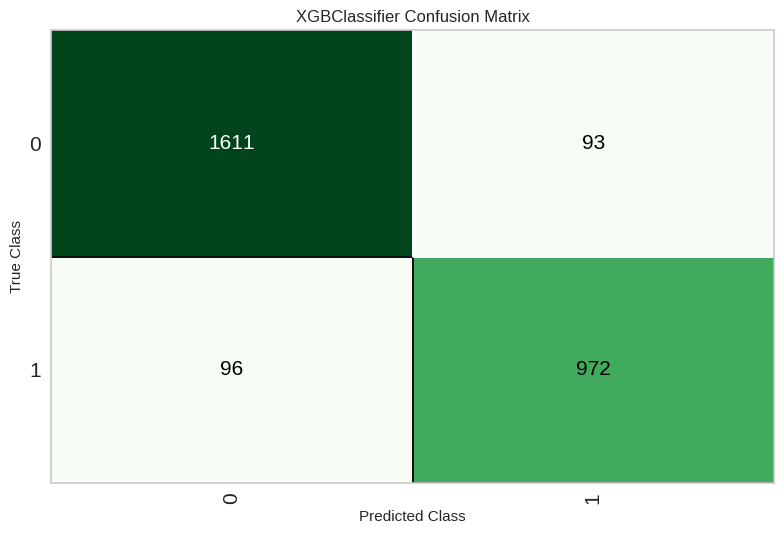

In [ ]:
# Confusion Matrix
plot_model(best_model, plot = 'confusion_matrix')


### The business value of this model

To attach business value to this model the following assumptions have to be made:

* Lead converted into sales will yield \$120 in Revenue for the first year
* Time and efforts spent on chasing prioritized leads (as predicted by the model) is \$15
* Opportunities missed by the model (False negatives) yield negative $120 as opportunity cost

Profit = \$88,830

Haven't fed in the assumptions of cost/profit yet hence the model is not a business-smart model.

Train, select, and optimize models using business metrics in order to achieve the business goal.

### Adding Custom Metric in PyCaret

In [ ]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (120-15), 0)
    fp = np.where((y_pred==1) & (y==0), -15, 0)
    fn = np.where((y_pred==0) & (y==1), -120, 0)
    return np.sum([tp,fp,fn])
# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [ ]:
# compare all models
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9369,0.9787,0.9150,0.9212,0.9179,0.8667,0.8669,21112.5000,1.2420
xgboost,Extreme Gradient Boosting,0.9382,0.9791,0.9146,0.9244,0.9193,0.8692,0.8694,21103.5000,0.6850
gbc,Gradient Boosting Classifier,0.9332,0.9777,0.9109,0.9156,0.9131,0.8589,0.8591,20866.5000,1.3740
rf,Random Forest Classifier,0.9323,0.9749,0.8945,0.9273,0.9105,0.8561,0.8566,19996.5000,0.8780
lr,Logistic Regression,0.9273,0.9725,0.8909,0.9184,0.9043,0.8457,0.8462,19759.5000,1.4140
ada,Ada Boost Classifier,0.9232,0.9716,0.8901,0.9087,0.8992,0.8371,0.8374,19677.0000,0.7360
et,Extra Trees Classifier,0.9247,0.9695,0.8825,0.9193,0.9003,0.8399,0.8405,19293.0000,0.9600
lda,Linear Discriminant Analysis,0.9225,0.9699,0.8764,0.9191,0.8971,0.8351,0.8359,18957.0000,0.5520
ridge,Ridge Classifier,0.9228,0.0000,0.8756,0.9207,0.8974,0.8356,0.8366,18918.0000,0.4740
dt,Decision Tree Classifier,0.9062,0.9032,0.8777,0.8788,0.8780,0.8018,0.8020,18861.0000,0.4570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

A new column Profit is added this time and Light Gradient Boosting Machine is the best model based on Profit rather than Catboost Classifier .

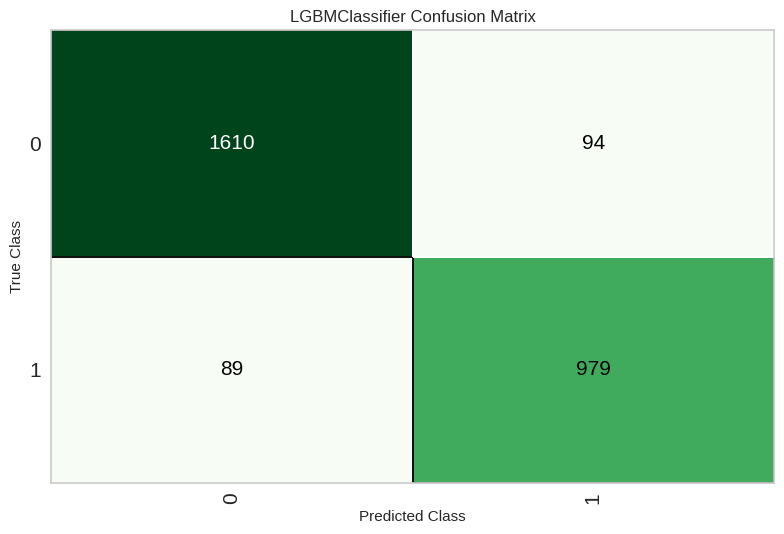

In [ ]:
# confusion matrix
plot_model(best_model, plot = 'confusion_matrix')


The confusion_matrix has changed since now how the model is making errors over false positives and false negatives. L

Putting some $ value against it, using the same assumptions (as above):

pic

* The profit is now \\$89,925 compared to \\$88,830 when Catboost Classifier was used (1.2% increase)




### Using the model to generate a lead score
Applying this model to new leads to generate the score since the best model has been selected:

In [ ]:
# create copy of data
data_new = data.copy()
data_new.drop('Converted', axis=1, inplace=True)
# generate labels using predict_model
predict_model(best_model, data=data_new, raw_score=True)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,prediction_label,prediction_score_0,prediction_score_1
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.00,Page Visited on Website,...,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,0.9971,0.0029
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.50,Email Opened,...,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,0.9448,0.0552
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.00,Email Opened,...,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,0.0082,0.9918
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.00,Unreachable,...,02.Medium,01.High,13.0,17.0,No,No,Modified,0,0.9981,0.0019
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.00,Converted to Lead,...,02.Medium,01.High,15.0,18.0,No,No,Modified,1,0.1603,0.8397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,8.0,1845,2.67,Email Marked Spam,...,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam,1,0.0055,0.9945
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,2.0,238,2.00,SMS Sent,...,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent,0,0.9881,0.0119
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,2.0,199,2.00,SMS Sent,...,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent,0,0.9992,0.0008
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,3.0,499,3.00,SMS Sent,...,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent,1,0.0263,0.9737


The last three columns are added to the dataset:
* Label (1 = conversion, 0 = no conversion)
* Score_0
* Score_1

They are the probability for each class between 0 to 1. For example, the first observation Score_0 is 0.9973 meaning a 99.7% probability for no conversion.

